# 0. Import Libraries

In [1]:
import pandas as pd 
from pandas_datareader import data as web
import numpy as np 
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Import Data

In [2]:
assets = ['BTC-USD','ETH-USD','BNB-USD','XRP-USD','ADA-USD'] #crypto tickers
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
test = web.DataReader(assets, 'yahoo', start='2020/11/10', end='2021/04/11')
test.tail()

Attributes     Adj Close                                               \
Symbols          BTC-USD      ETH-USD     BNB-USD   XRP-USD   ADA-USD   
Date                                                                    
2021-04-06  56048.937500  1971.077271  374.658813  0.917576  1.175149   
2021-04-07  58323.953125  2088.573730  418.038391  1.052756  1.219436   
2021-04-08  58245.003906  2072.108887  453.178467  1.020837  1.203540   
2021-04-09  59793.234375  2135.942139  472.560333  1.374416  1.218758   
2021-04-11  60203.976562  2163.083984  503.218323  1.386217  1.269777   

Attributes         Close                                               ...  \
Symbols          BTC-USD      ETH-USD     BNB-USD   XRP-USD   ADA-USD  ...   
Date                                                                   ...   
2021-04-06  56048.937500  1971.077271  374.658813  0.917576  1.175149  ...   
2021-04-07  58323.953125  2088.573730  418.038391  1.052756  1.219436  ...   
2021-04-08  58245.003906  2072.108887  453.178467  1.020837  1.203540  ...   
2021-04-09  59793.234375  2135.942139  472.560333  1.374416  1.218758  ...   
2021-04-11  60203.976562  2163.083984  503.218323  1.386217  1.269777  ...   

Attributes          Open                                               \
Symbols          BTC-USD      ETH-USD     BNB-USD   XRP-USD   ADA-USD   
Date                                                                    
2021-04-06  58186.507812  2117.728516  403.699280  1.097547  1.255457   
2021-04-07  56099.914062  1969.133179  376.269012  0.919055  1.176132   
2021-04-08  58326.562500  2088.772217  418.054718  1.053417  1.219454   
2021-04-09  58253.777344  2071.111572  454.343170  1.020282  1.203533   
2021-04-11  59832.035156  2143.174072  464.840485  1.391385  1.265772   

Attributes       Volume                                                    
Symbols         BTC-USD      ETH-USD     BNB-USD      XRP-USD     ADA-USD  
Date                                                                       
2021-04-06  75645303584  36116271935  5976362849  21942171678  4771395490  
2021-04-07  53053855641  25312956529  4550316562  12888349509  2315835365  
2021-04-08  46655208546  19812472092  4701175013  10235269531  1678933674  
2021-04-09  58238470525  24986243611  6160670397  25547794935  2481275569  
2021-04-11  47848927232  20384362496  5043861504  23583350784  3342792960  

[5 rows x 30 columns]

In [4]:
df = test['Adj Close']
df.head()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD
Date,,,,,
2020-11-10,15290.902344,449.679626,28.193342,0.253911,0.105805
2020-11-11,15701.339844,462.960541,27.956179,0.256259,0.105965
2020-11-12,16276.343750,461.005280,27.614807,0.254903,0.104525
2020-11-13,16317.808594,474.626434,28.182173,0.265191,0.106391
2020-11-14,16068.138672,460.149841,27.936201,0.268342,0.104202


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2020-11-10 to 2021-04-11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC-USD  153 non-null    float64
 1   ETH-USD  153 non-null    float64
 2   BNB-USD  153 non-null    float64
 3   XRP-USD  153 non-null    float64
 4   ADA-USD  153 non-null    float64
dtypes: float64(5)
memory usage: 7.2 KB


# 2.Visualise the data

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

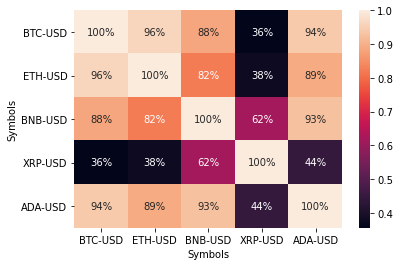

In [6]:
sns.heatmap(df.corr(), annot = True, fmt= '.0%')

Bitcoin is the largest cryptocurrency and it currently is 55% of the entire cryptocurrenty market. 

Generally, when BTC rises the rest of the market rises. XRP is the only outliner of the four altcoins as it possesses a negative relationship with the other assets.

This is probably due to the U.S. Securities and Exchange Commission placing a lawsuit against Ripple Labs, the creator of XRP.
The price of XRP(USD) fell from 0.28 to 0.24 within the first 20 minutes of the announcement.


In [7]:
returns = df.pct_change()
returns

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD
Date,,,,,
2020-11-10,NaN,NaN,NaN,NaN,NaN
2020-11-11,0.026842,0.029534,-0.008412,0.009247,0.001512
2020-11-12,0.036621,-0.004223,-0.012211,-0.005292,-0.013589
2020-11-13,0.002548,0.029547,0.020546,0.040360,0.017852
2020-11-14,-0.015300,-0.030501,-0.008728,0.011882,-0.020575
...,...,...,...,...,...
2021-04-06,-0.036833,-0.069535,-0.071686,-0.162999,-0.063890
2021-04-07,0.040590,0.059610,0.115784,0.147323,0.037686
2021-04-08,-0.001354,-0.007883,0.084059,-0.030319,-0.013036


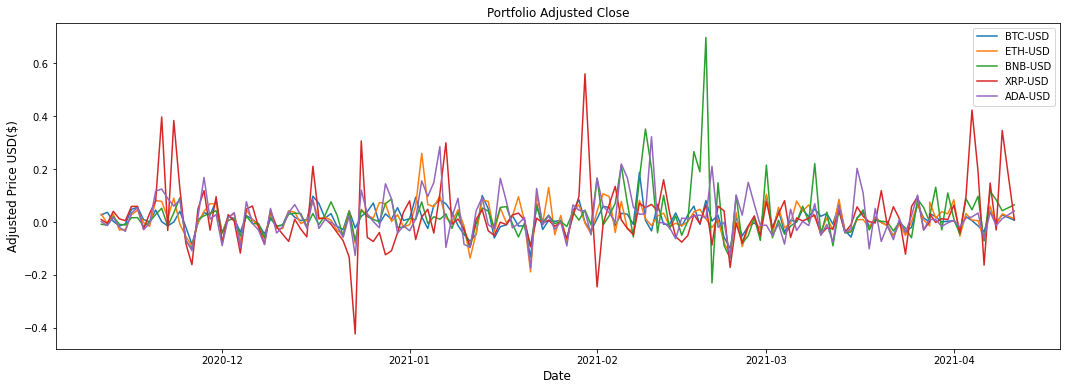

In [8]:
plt.figure(figsize = (18,6))
plt.plot(df.pct_change())
plt.title('Portfolio Adjusted Close')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Adjusted Price USD($)', fontsize = 12)
plt.legend(assets)
plt.show()

It's clear that over this period, BNB and XRP are the most volatile assets. 
Volatile assets are often considered riskier than less volatile assets because the price is expected to be less predictable.
A short-term investor would interested in assets that are volatile as there is more opportunity to make profit.


# 3. Calculate Returns

Calculate the annualised covariance to find the direction of the relationship of two asset prices

In [9]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()  #365 is the number of trading days over this time period
cov_matrix_annual = cov_matrix * 365
cov_matrix_annual

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD
Symbols,,,,,
BTC-USD,0.641595,0.594766,0.598319,0.462034,0.478436
ETH-USD,0.594766,1.090368,0.712464,0.797891,0.829268
BNB-USD,0.598319,0.712464,2.475925,0.940870,0.789225
XRP-USD,0.462034,0.797891,0.940870,4.282176,0.784244
ADA-USD,0.478436,0.829268,0.789225,0.784244,2.004425


Calculate the portfolio variance 

In [10]:
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.9787809261254886

Calculate the volatility of the portfolio

In [11]:
portfolio_vol = np.sqrt(portfolio_variance)
portfolio_vol

0.9893335767704888

Calculate the annual portfolio return

In [12]:
portfolio_return = np.sum(returns.mean() * weights) * 365
portfolio_return

5.919903860174944

# 4. Finding

In [13]:
percent_var = str(round(portfolio_variance, 2) * 100) + '%'
percent_vol = str(round(portfolio_vol, 2) * 100) + '%'
percent_return = str(round(portfolio_return, 2) * 100) + '%'

print('Annual Variance: ' + percent_var)
print('Annual Volatility/Risk: ' + percent_vol)
print('Expected Annual Return: ' + percent_return)

Annual Variance: 98.0%
Annual Volatility/Risk: 99.0%
Expected Annual Return: 592.0%


If we held this portfolio, we would have an expected return of 588%. We ought to bear in mind the volatility of the portfolio. For comparison S&P 500 Index had generated returns of 18.40% in 2020. It’s clear to see why more institutional investors are looking at cryptocurrency as an alternative investment.

# 5. Portfolio Optimisation

In [14]:
import pypfopt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

Calculate the expected return of the asset return

In [15]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

Optimiize the max sharpe ratio

In [16]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximising the sharpe ratio and finding out the raw weights for portfolio optimsation
cleaned_weights = ef.clean_weights() 

print(cleaned_weights) 
ef.portfolio_performance(verbose = True)

OrderedDict([('BTC-USD', 0.0), ('ETH-USD', 0.0), ('BNB-USD', 0.69425), ('XRP-USD', 0.0), ('ADA-USD', 0.30575)])
Expected annual return: 10033.8%
Annual volatility: 119.2%
Sharpe Ratio: 84.13


(100.33788928075951, 1.192476257817037, 84.12569107615006)

Listed above are the optimal asset distribution that would provide the greatest expected return with the lowest financial risk. 
According to the results, our optimal portfolio should consists of 70% of Binance Coin and 30% of Cardona. By holding a diversified portfolio, annualised risk increased from 99% to 119% compared to our optimal portfolio. On the other hand, at this ratio we would increase our expected annual returns from 588% to 9683%.

# 6. Alternative Investment Method

Instead of holding the five largest cryptocurrencies my market capitalisation, what would happen if we just held one?
If we decided to hold bitcoin over this period, would we see a significant change in volatility or return?

I decided to compare the variance, risk, and return of Bitcoin to our portfolio over the same period.

In [17]:
alt_df = web.DataReader('BTC-USD', 'yahoo', start='2020/11/10', end='2021/11/04')
alt_df = alt_df['Adj Close'].astype(int)
alt_df.tail(5)

Date
2021-04-06    56048
2021-04-07    58323
2021-04-08    58245
2021-04-09    59793
2021-04-11    60203
Name: Adj Close, dtype: int32

In [18]:
#Variance
alt_var = alt_df.var()
alt_percent_var = str(round(alt_var, 2) * 100) + '%'
print('Variance: ' + alt_percent_var)

#Volatility
alt_vol = np.sqrt(alt_var)
alt_percent_vol = str(round(alt_vol, 2) * 100) + '%'
print('Volatility/Risk: ' + alt_percent_vol)

#Expected Returns
alt_returns = alt_df.pct_change()
alt_returns = np.sum(alt_df.pct_change())
alt_percent_return = str(round(alt_returns, 2) * 100) + '%'
print('Expected Return: ' + alt_percent_return)


Variance: 22932629416.0%
Volatility/Risk: 1514352.0%
Expected Return: 151.0%


The alternative portfolio has significantly higher risk at 1,514,183% compared to the optimal portfolio which has a volatility of 199.3%.  

A investment manager manages money for clients and will require a portfolio with high return and low risk. With other things being equal, a rational investment manager would choose the optimal or alternative portfolio as opposed to holding Bitcoin as it has lower volatility (lower risk).